# Single-Layer Perceptron Networks
## IE7860 Intelligent Engineering Systems Winter 2020
### Kayleigh James

1. Write Code using a procedural programming language for a generic single-layer perceptron network. 

> My single-layer perceptron function takes in an input array which is a numpy matrix, an output array that is a numpy matrix (it should be a 1 dimensional array) and a learning rate.  

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron(input_array, output_array, learning_rate):
  n = input_array.shape[0] #number of rows (training points)
  m = input_array.shape[1] + 1 #number of columns (inputs)
  weights = np.zeros(m)
  x = np.insert(input_array, 0, 1, axis=1)
  epoch = 1
  errors = 0
  for j in range (200):
    for i in range(n):
      #compute output response y(n) = sgn[w(n)T*x(n)]
      y = np.sign(np.dot(np.transpose(weights),x[i]))
      if y == -1:
        y = 0
      else:
        y = 1
      #update weights by comparing actual response to desired response
      weights = weights + learning_rate*(output_array[i]-y)*x[i]
      if (output_array[i]-y != 0):
        errors = errors + 1
      #stop when there are no errors
    print("Epoch Number: ", epoch)    
    print("Number of errors for this epoch: ", errors)
    print("Final weights for this epoch: ", weights, "\n")
    if errors == 0:
      break
    epoch = epoch + 1
    errors = 0

Now we will test this function using the two data sets available on the Canvas post for this assignment. The perceptron will only reach a solution when the classes are **linearly separable**.  You can use the numpy library to take a .txt file and turn it into a numpy matrix/array.  There should be no headers in the file, and the class should be specified in a column.  

In [13]:
my_data = np.genfromtxt('Two_Class_Gaussian_Data.csv', delimiter=',')
perceptron(my_data[:,[0,1]], my_data[:,2], 0.01)

Epoch Number:  1
Number of errors for this epoch:  13
Final weights for this epoch:  [0.03     0.039146 0.029722] 

Epoch Number:  2
Number of errors for this epoch:  9
Final weights for this epoch:  [0.02     0.046631 0.029506] 

Epoch Number:  3
Number of errors for this epoch:  6
Final weights for this epoch:  [0.02     0.03861  0.020217] 

Epoch Number:  4
Number of errors for this epoch:  10
Final weights for this epoch:  [0.02     0.041874 0.040102] 

Epoch Number:  5
Number of errors for this epoch:  8
Final weights for this epoch:  [0.02     0.037646 0.027732] 

Epoch Number:  6
Number of errors for this epoch:  6
Final weights for this epoch:  [0.02     0.029625 0.018443] 

Epoch Number:  7
Number of errors for this epoch:  10
Final weights for this epoch:  [0.02     0.032889 0.038328] 

Epoch Number:  8
Number of errors for this epoch:  9
Final weights for this epoch:  [0.03     0.03456  0.027124] 

Epoch Number:  9
Number of errors for this epoch:  9
Final weights for this e

We can see that even after 200 epochs, the single-layer perceptron network has still not found a solution.  Let's plot the data and see if it is linearly separable:

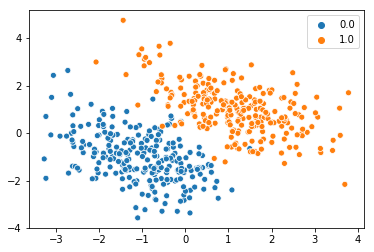

In [12]:
import seaborn as sns
sns.scatterplot(x = my_data[:,0], y = my_data[:,1], hue = my_data[:,2])

We can see that the data is **not** linearly separable and therefore the perceptron will never find a linear hyperplane to separate the two classes.  Let's try another dataset:

Epoch Number:  1
Number of errors for this epoch:  2
Final weights for this epoch:  [0.       0.01042  0.010441] 

Epoch Number:  2
Number of errors for this epoch:  2
Final weights for this epoch:  [0.       0.02084  0.020882] 

Epoch Number:  3
Number of errors for this epoch:  3
Final weights for this epoch:  [-0.01      0.022134  0.02348 ] 

Epoch Number:  4
Number of errors for this epoch:  3
Final weights for this epoch:  [-0.02      0.023428  0.026078] 

Epoch Number:  5
Number of errors for this epoch:  3
Final weights for this epoch:  [-0.03      0.023378  0.023575] 

Epoch Number:  6
Number of errors for this epoch:  1
Final weights for this epoch:  [-0.04      0.013442  0.013785] 

Epoch Number:  7
Number of errors for this epoch:  0
Final weights for this epoch:  [-0.04      0.013442  0.013785] 



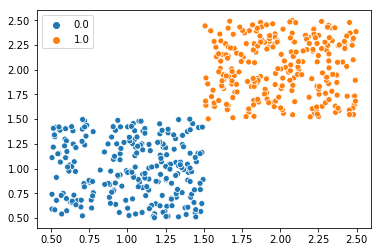

In [17]:
my_data = np.genfromtxt('Two_Class_Uniform_Data.csv', delimiter=',')
perceptron(my_data[:,[0,1]], my_data[:,2], 0.01)
sns.scatterplot(x = my_data[:,0], y = my_data[:,1], hue = my_data[:,2])

We can see that this dataset only required 7 epochs to reach no errors.  By plotting the data we can also see that this dataset is linearly separable.  

2. We may formally state that that so long as we limit ourselves to the model of a neuron that consists of a linear combiner followed by a nonlinear element, then regardless of the form of nonlinearity used, a single-layer perceptron can perform pattern classification only on linearly separable patterns.  Justify/demonstrate the validity of the above thesis.



> The reason we can confirm the above thesis is that the decision boundary is determined by **only** the linear combiner.  Since the linear combiner is, well, linear and the nonlinear element plays no role in determining the hyperplane that separates the classes, then the single-layer perceptron will only be able to work for linearly separable patterns.  From the textbook (figure 1.2 on page 49) for this course we can see the decision bondary is calculated by the linear combination of the input vector, weight vector, and bias.  The nonlinear element does not factor into this computation.



3. The perceptron may be used to perform numerous logic functions.  Demonstrate the implementation of the binary logic functions AND, OR, and COMPLEMENT.  However, a basic limitation of the prceptron is that it cannot implement the EXCLUSIVE OR function.  Justify/demonstrate the validit of this limitation:


> Here is the implementation of logical AND:



In [38]:
and_inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
and_outputs = np.array([0,0,0,1])
perceptron(and_inputs, and_outputs, 0.01)

Epoch Number:  1
Number of errors for this epoch:  2
Final weights for this epoch:  [0.   0.01 0.01] 

Epoch Number:  2
Number of errors for this epoch:  3
Final weights for this epoch:  [-0.01  0.02  0.01] 

Epoch Number:  3
Number of errors for this epoch:  3
Final weights for this epoch:  [-0.02  0.02  0.01] 

Epoch Number:  4
Number of errors for this epoch:  2
Final weights for this epoch:  [-0.02  0.02  0.02] 

Epoch Number:  5
Number of errors for this epoch:  1
Final weights for this epoch:  [-0.03  0.02  0.01] 

Epoch Number:  6
Number of errors for this epoch:  0
Final weights for this epoch:  [-0.03  0.02  0.01] 






> Here is the implementation of logical OR:





In [39]:
or_inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
or_outputs = np.array([0,1,1,1])
perceptron(or_inputs, or_outputs, 0.01)

Epoch Number:  1
Number of errors for this epoch:  2
Final weights for this epoch:  [0.   0.   0.01] 

Epoch Number:  2
Number of errors for this epoch:  2
Final weights for this epoch:  [0.   0.01 0.01] 

Epoch Number:  3
Number of errors for this epoch:  1
Final weights for this epoch:  [-0.01  0.01  0.01] 

Epoch Number:  4
Number of errors for this epoch:  0
Final weights for this epoch:  [-0.01  0.01  0.01] 





> Here is the implementation of logical COMPLEMENT:



In [45]:
complement_inputs = np.array([[0],[1]])
complement_outputs = np.array([1,0])
perceptron(complement_inputs, complement_outputs, 0.01)

Epoch Number:  1
Number of errors for this epoch:  1
Final weights for this epoch:  [-0.01 -0.01] 

Epoch Number:  2
Number of errors for this epoch:  1
Final weights for this epoch:  [ 0.   -0.01] 

Epoch Number:  3
Number of errors for this epoch:  0
Final weights for this epoch:  [ 0.   -0.01] 




> Here is the implementation of logical EXCLUSIVE OR:



In [40]:
xor_inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
xor_outputs = np.array([0,1,1,0])
perceptron(xor_inputs, xor_outputs, 0.01)

Epoch Number:  1
Number of errors for this epoch:  3
Final weights for this epoch:  [-0.01 -0.01  0.  ] 

Epoch Number:  2
Number of errors for this epoch:  3
Final weights for this epoch:  [ 0.   -0.01  0.  ] 

Epoch Number:  3
Number of errors for this epoch:  4
Final weights for this epoch:  [ 0.   -0.01  0.  ] 

Epoch Number:  4
Number of errors for this epoch:  4
Final weights for this epoch:  [ 0.   -0.01  0.  ] 

Epoch Number:  5
Number of errors for this epoch:  4
Final weights for this epoch:  [ 0.   -0.01  0.  ] 

Epoch Number:  6
Number of errors for this epoch:  4
Final weights for this epoch:  [ 0.   -0.01  0.  ] 

Epoch Number:  7
Number of errors for this epoch:  4
Final weights for this epoch:  [ 0.   -0.01  0.  ] 

Epoch Number:  8
Number of errors for this epoch:  4
Final weights for this epoch:  [ 0.   -0.01  0.  ] 

Epoch Number:  9
Number of errors for this epoch:  4
Final weights for this epoch:  [ 0.   -0.01  0.  ] 

Epoch Number:  10
Number of errors for this ep

I limited the number of epochs in my perceptron function to 100 because otherwise for a non-linearly separable dataset the program would run on forever.  The reason the EXCLUSIVE OR cannot be implemented using a perceptron is because XOR is not a linearly separable function.  This means that the two classes (a logical 1 or 0) can not be separated by a line.  This can be visualized below:

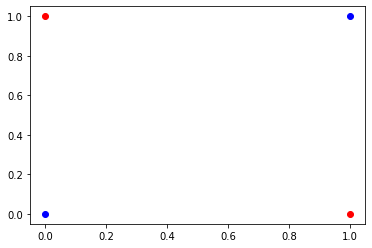

In [52]:
import matplotlib.pyplot as plt
plt.plot([0, 1], [1, 0], 'ro')
plt.plot([1, 0], [1, 0], 'bo')

The blue points in the plot are where XOR is 0, the red points are where XOR is 1.  As one can see there is no straight line (e.g. a linear hyperplane) that can be drawn that separates the two classes (colors).  We know that the single-layer perceptron can not be implemented for non-linearly separable classes, therefore it cannot implement EXCLUSIVE OR.